In [8]:
import numpy as np
import scipy as scp
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

In [9]:
Fs, x = wav.read('V0_LFM15k.wav')
dt = 1/Fs
N = len(x)
df = 1/(dt*N)
t = 1/df

# initializing spectrogram parameters

In [12]:
overlap = .25
step = 4800 #rename winStep
# winStep = 4800
N_start = 0
N_stop = int(N_start + (step))
N_step = int(512*overlap) # rename step
NNstep = 512
# N_step = int(512*overlap)
N_rec = int(np.floor(len(x)/(N_step)))

# spectrogram function

In [25]:
def Spectrogram(x, Fs, overlap, step, N_start,NNstep):
    N_step = int(NNstep*overlap)
    N_stop = int(N_start + (step))
    w = np.hanning(step)
    spec = np.empty([int(step/2),int(N_rec-1)])
    for m in range(int(N_rec - 2)):
        if N_stop > len(x):
            break
        yy = w * x[N_start:N_stop]
        Sxx = 2* (df * (np.abs(np.fft.fft(yy)) ** 2))
        Gxx = Sxx[0:int(step/2)].copy()
        Gxx[0] /= 2
        Gxx /= np.max(np.abs(Gxx))
        spec[:,m] = Gxx
        N_start += N_step
        N_stop += N_step
    
    spec = np.flip(spec.copy(), axis=0)
    
    # plot stuff
    tVec = np.linspace(0,dt,int((N*dt)),endpoint=False)
    fVec = np.linspace(0,df,int(Fs/2), endpoint=False)
    
    fig, ax = plt.subplots()
    plt.imshow(spec, extent=[0,int(N*dt),0,int(Fs/2)], aspect='auto')
    plt.xlabel("Time(s)")
    plt.ylabel("Frequency (Hz)")
    
    plt.show()

# Spectrogram Generation

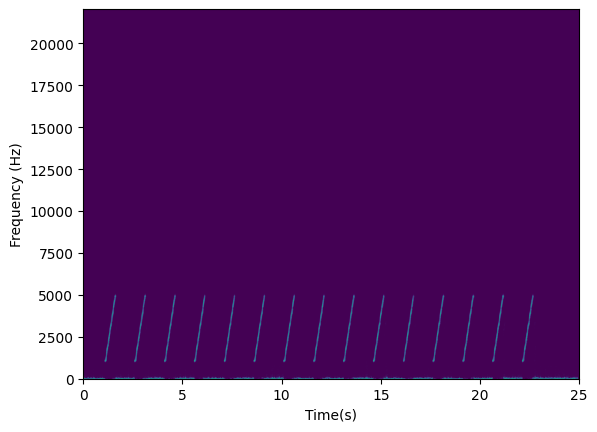

In [26]:
y = Spectrogram(x,Fs,overlap,step,N_start,NNstep)